In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                   
from matplotlib import pyplot as plt  
from sklearn import svm
%matplotlib inline

# High level data exploration

In [2]:
df = pd.read_csv('MSD-full.csv') # load the newly created CSV into a dataframe

In [3]:
df.dtypes # look at the types of data

analysis_sample_rate      int64
artist_familiarity      float64
artist_hotttnesss       float64
artist_latitude         float64
artist_longitude        float64
artist_name              object
artist_terms              int64
bars_start                int64
beats_start               int64
duration                float64
end_of_fade_in          float64
key                       int64
loudness                float64
mode                      int64
mode_confidence         float64
release                  object
segments_pitches         object
segments_start            int64
song_hotttnesss         float64
start_of_fade_out       float64
tempo                   float64
time_signature            int64
title                    object
year                      int64
dtype: object

In [4]:
df.shape # look at the shape of data

(10000, 24)

In [5]:
df.head()

,analysis_sample_rate,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude,artist_name,artist_terms,bars_start,beats_start,duration,...,mode_confidence,release,segments_pitches,segments_start,song_hotttnesss,start_of_fade_out,tempo,time_signature,title,year
0,22050,0.581794,0.401998,NaN,NaN,Casual,37,83,344,218.93179,...,0.636,Fear Itself,"(971, 12)",971,0.602120,218.932,92.198,4,"I Didnt Mean To""",0
1,22050,0.630630,0.417500,35.14968,-90.04892,The Box Tops,38,73,296,148.03546,...,0.430,Dimensions,"(550, 12)",550,NaN,137.915,121.274,4,Soul Deep,1969
2,22050,0.487357,0.343428,NaN,NaN,Sonora Santanera,10,291,291,177.47546,...,0.565,Las Numero 1 De La Sonora Santanera,"(562, 12)",562,NaN,172.304,100.070,1,Amor De Cabaret,0
3,22050,0.630382,0.454231,NaN,NaN,Adam Ant,43,115,462,233.40363,...,0.749,Friend Or Foe,"(821, 12)",821,NaN,217.124,119.293,4,Something Girls,1982
4,22050,0.651046,0.401724,NaN,NaN,Gob,38,110,444,209.60608,...,0.371,Muertos Vivos,"(673, 12)",673,0.604501,198.699,129.738,4,Face the Ashes,2007


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   analysis_sample_rate  10000 non-null  int64  
 1   artist_familiarity    9996 non-null   float64
 2   artist_hotttnesss     10000 non-null  float64
 3   artist_latitude       3742 non-null   float64
 4   artist_longitude      3742 non-null   float64
 5   artist_name           10000 non-null  object 
 6   artist_terms          10000 non-null  int64  
 7   bars_start            10000 non-null  int64  
 8   beats_start           10000 non-null  int64  
 9   duration              10000 non-null  float64
 10  end_of_fade_in        10000 non-null  float64
 11  key                   10000 non-null  int64  
 12  loudness              10000 non-null  float64
 13  mode                  10000 non-null  int64  
 14  mode_confidence       10000 non-null  float64
 15  release             

In [7]:
df.describe() 

,analysis_sample_rate,artist_familiarity,artist_hotttnesss,artist_latitude,artist_longitude,artist_terms,bars_start,beats_start,duration,end_of_fade_in,key,loudness,mode,mode_confidence,segments_start,song_hotttnesss,start_of_fade_out,tempo,time_signature,year
count,10000.0,9996.000000,10000.000000,3742.000000,3742.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5648.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,22050.0,0.565456,0.385552,37.157357,-63.933358,26.661100,164.979200,480.994500,238.507518,0.758616,5.276100,-10.485669,0.691100,0.477784,857.740600,0.342822,229.975465,122.915449,3.564800,934.704600
std,0.0,0.160161,0.143647,15.598494,50.508223,13.555782,145.928359,273.768992,114.137514,1.867952,3.554087,5.399788,0.462063,0.191254,490.003715,0.247220,112.195735,35.184412,1.266239,996.650657
min,22050.0,0.000000,0.000000,-41.280540,-162.436500,0.000000,0.000000,0.000000,1.044440,0.000000,0.000000,-51.643000,0.000000,0.000000,4.000000,0.000000,1.044000,0.000000,0.000000,0.000000
25%,22050.0,0.467611,0.325266,33.748310,-93.291560,15.000000,85.000000,317.000000,176.032200,0.000000,2.000000,-13.163250,0.000000,0.360000,563.000000,0.000000,168.856000,96.965750,3.000000,0.000000
50%,22050.0,0.563666,0.380742,38.997920,-80.237420,25.000000,122.000000,434.000000,223.059140,0.199000,5.000000,-9.380000,1.000000,0.487000,766.500000,0.360371,213.879000,120.161000,4.000000,0.000000
75%,22050.0,0.668020,0.453858,43.648560,-9.401020,39.000000,184.000000,588.000000,276.375060,0.421000,8.000000,-6.532500,1.000000,0.606000,1029.250000,0.537504,266.292000,144.013250,4.000000,2000.000000
max,22050.0,1.000000,1.082503,69.651020,174.767140,91.000000,1676.000000,7880.000000,1819.767710,43.119000,11.000000,0.566000,1.000000,1.000000,8419.000000,1.000000,1813.426000,262.828000,7.000000,2010.000000


In [8]:
df.isnull().sum() # null values in five different features, though more in location and hotttnesss

analysis_sample_rate       0
artist_familiarity         4
artist_hotttnesss          0
artist_latitude         6258
artist_longitude        6258
artist_name                0
artist_terms               0
bars_start                 0
beats_start                0
duration                   0
end_of_fade_in             0
key                        0
loudness                   0
mode                       0
mode_confidence            0
release                    0
segments_pitches           0
segments_start             0
song_hotttnesss         4352
start_of_fade_out          0
tempo                      0
time_signature             0
title                      1
year                       0
dtype: int64

# Data cleansing

In [9]:
df=df.drop(['artist_latitude', 
            'artist_longitude',
            'artist_name', 
            'release', 
            'title',
            'segments_pitches',], axis=1)

#drop these columns

In [10]:
df['year'] = df['year'].replace({'0':np.nan, 0:np.nan}) #replace 0 value years with null values

In [11]:
df['song_hotttnesss'] = df['song_hotttnesss'].replace({'0':np.nan, 0:np.nan}) #replace 0 value hotttnesss with null values

In [12]:
df = df.dropna() #drop null values

In [13]:
bin_labels = [0,1]
df['is_hot'] = pd.qcut(df['song_hotttnesss'],
                              q=[0, .5, 1],
                              labels=bin_labels)
df.head()
#create is_hot category

,analysis_sample_rate,artist_familiarity,artist_hotttnesss,artist_terms,bars_start,beats_start,duration,end_of_fade_in,key,loudness,mode,mode_confidence,segments_start,song_hotttnesss,start_of_fade_out,tempo,time_signature,year,is_hot
4,22050,0.651046,0.401724,38,110,444,209.60608,0.066,2,-4.501,1,0.371,673,0.604501,198.699,129.738,4,2007.0,1
8,22050,0.426668,0.332276,24,93,381,269.81832,5.300,4,-13.496,1,0.652,912,0.265861,258.990,86.643,4,1984.0,0
15,22050,0.636424,0.447935,48,246,990,491.12771,0.000,7,-8.576,1,0.829,1628,0.405116,486.034,119.826,4,1987.0,0
18,22050,0.707200,0.513463,48,177,714,290.29832,0.145,7,-5.271,1,0.756,832,0.684136,285.605,150.062,4,2004.0,1
23,22050,0.839963,0.541889,32,142,572,207.77751,0.061,7,-4.264,1,0.453,719,0.666528,204.696,166.862,4,2004.0,1


In [14]:
df.info() #null values have been successfully removed!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712 entries, 4 to 9999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   analysis_sample_rate  2712 non-null   int64   
 1   artist_familiarity    2712 non-null   float64 
 2   artist_hotttnesss     2712 non-null   float64 
 3   artist_terms          2712 non-null   int64   
 4   bars_start            2712 non-null   int64   
 5   beats_start           2712 non-null   int64   
 6   duration              2712 non-null   float64 
 7   end_of_fade_in        2712 non-null   float64 
 8   key                   2712 non-null   int64   
 9   loudness              2712 non-null   float64 
 10  mode                  2712 non-null   int64   
 11  mode_confidence       2712 non-null   float64 
 12  segments_start        2712 non-null   int64   
 13  song_hotttnesss       2712 non-null   float64 
 14  start_of_fade_out     2712 non-null   float64 
 15  temp

# Feature plotting

<function matplotlib.pyplot.show(close=None, block=None)>

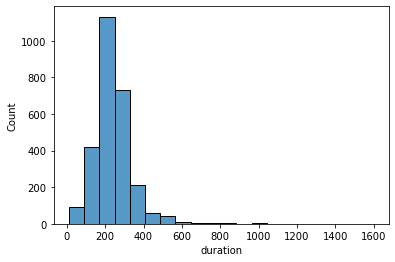

In [15]:
sns.histplot(df['duration'], bins=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

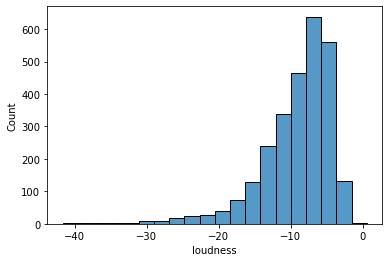

In [16]:
sns.histplot(df['loudness'],bins=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

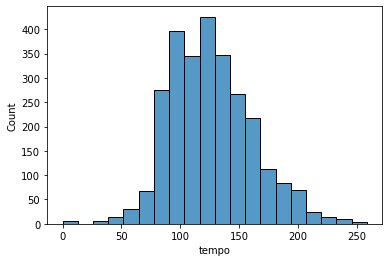

In [17]:
sns.histplot(df['tempo'], bins=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

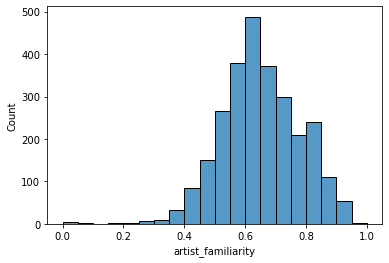

In [18]:
sns.histplot(df['artist_familiarity'], bins=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

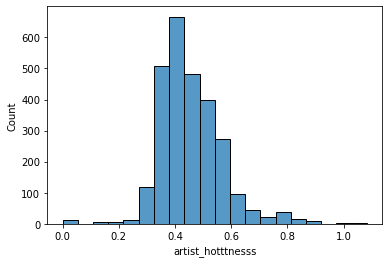

In [19]:
sns.histplot(df['artist_hotttnesss'], bins=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

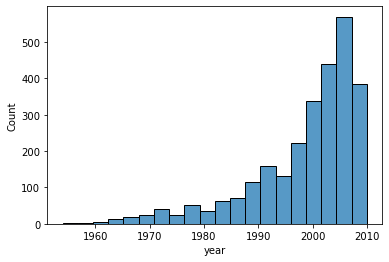

In [20]:
sns.histplot(df['year'], bins=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

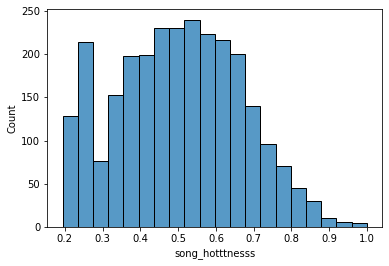

In [21]:
sns.histplot(df['song_hotttnesss'], bins=20)
plt.show

/Users/tiffanymoran/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='key', ylabel='count'>

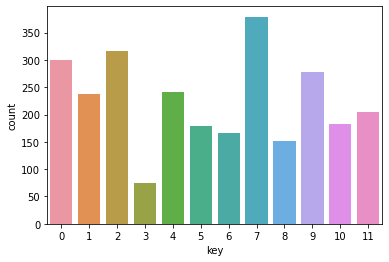

In [22]:
sns.countplot(df['key'])

<AxesSubplot:xlabel='song_hotttnesss', ylabel='tempo'>

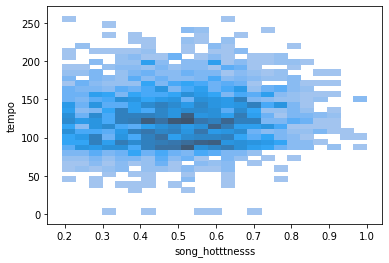

In [23]:
sns.histplot(df, x=df['song_hotttnesss'], y=df['tempo'])

Text(0, 0.5, 'Percentage')

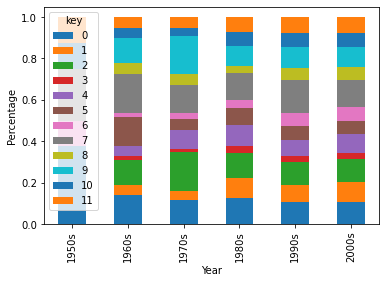

In [24]:
bins=[1950,1960, 1970, 1980, 1990, 2000, 2010, 2020]
group=['1950s','1960s','1970s', '1980s', '1990s', '2000s', '2010s']
df['Decades_bin']=pd.cut(df['year'],bins,labels=group)
Decades_bin=pd.crosstab(df['Decades_bin'],df['key'])
Decades_bin.div(Decades_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Year')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

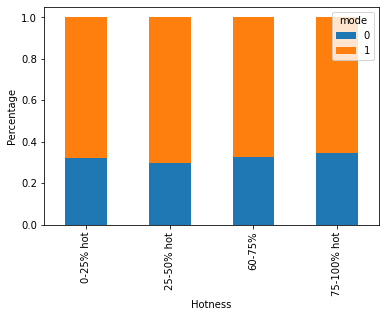

In [25]:
binsA=[0,0.25,0.5, 0.75, 1]
group=['0-25% hot','25-50% hot','60-75%', '75-100% hot']
df['hotness_bin']=pd.cut(df['song_hotttnesss'],binsA,labels=group)
hotness_bin=pd.crosstab(df['hotness_bin'],df['mode'])
hotness_bin.div(hotness_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Hotness')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

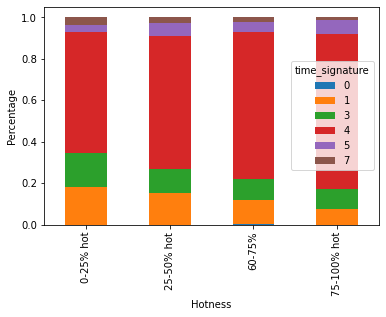

In [26]:
binsA=[0,0.25,0.5, 0.75, 1]
group=['0-25% hot','25-50% hot','60-75%', '75-100% hot']
df['hotness_bin']=pd.cut(df['song_hotttnesss'],binsA,labels=group)
hotness_bin=pd.crosstab(df['hotness_bin'],df['time_signature'])
hotness_bin.div(hotness_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Hotness')
plt.ylabel('Percentage')

In [27]:
df = df.drop(['Decades_bin', 'hotness_bin'], axis=1)

# Normalisation

In [28]:
from sklearn.cluster import KMeans

In [29]:
from sklearn import preprocessing

In [30]:
df['loudness'] = df['loudness'].abs() #take the absolute value of loudness to remove negative numbers for normalisation

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
cols = ['is_hot']
le = LabelEncoder()                       # initialise the necessary function taken from the LabelEncoder library
for col in cols:                          # iterate over all variables in cols
    df[col] = le.fit_transform(df[col])

In [33]:
df=(df-df.min())/(df.max()-df.min()) #normalise data

In [34]:
df = df.reset_index() #reset the index

In [35]:
df.head()

,index,analysis_sample_rate,artist_familiarity,artist_hotttnesss,artist_terms,bars_start,beats_start,duration,end_of_fade_in,key,loudness,mode,mode_confidence,segments_start,song_hotttnesss,start_of_fade_out,tempo,time_signature,year,is_hot
0,4,NaN,0.651046,0.371106,0.473684,0.099458,0.184462,0.125491,0.002002,0.181818,0.095684,1.0,0.371,0.171539,0.509393,0.119373,0.501544,0.571429,0.946429,1.0
1,8,NaN,0.426668,0.306951,0.289474,0.084087,0.158288,0.163412,0.160742,0.363636,0.314407,1.0,0.652,0.233376,0.089318,0.157583,0.334947,0.571429,0.535714,0.0
2,15,NaN,0.636424,0.413796,0.605263,0.222423,0.411300,0.302789,0.000000,0.636364,0.194772,1.0,0.829,0.418629,0.262060,0.301476,0.463226,0.571429,0.589286,0.0
3,18,NaN,0.707200,0.474330,0.605263,0.160036,0.296635,0.176310,0.004398,0.636364,0.114407,1.0,0.756,0.212678,0.608179,0.174451,0.580113,0.571429,0.892857,1.0
4,23,NaN,0.839963,0.500589,0.394737,0.128391,0.237640,0.124340,0.001850,0.636364,0.089921,1.0,0.453,0.183441,0.586336,0.123173,0.645059,0.571429,0.892857,1.0


In [36]:
df = df.drop(['analysis_sample_rate', 'index'], axis=1) #drop analysis_sample_rate and index columns

# Correlation Matrix

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
corr=df.corr()

<AxesSubplot:>

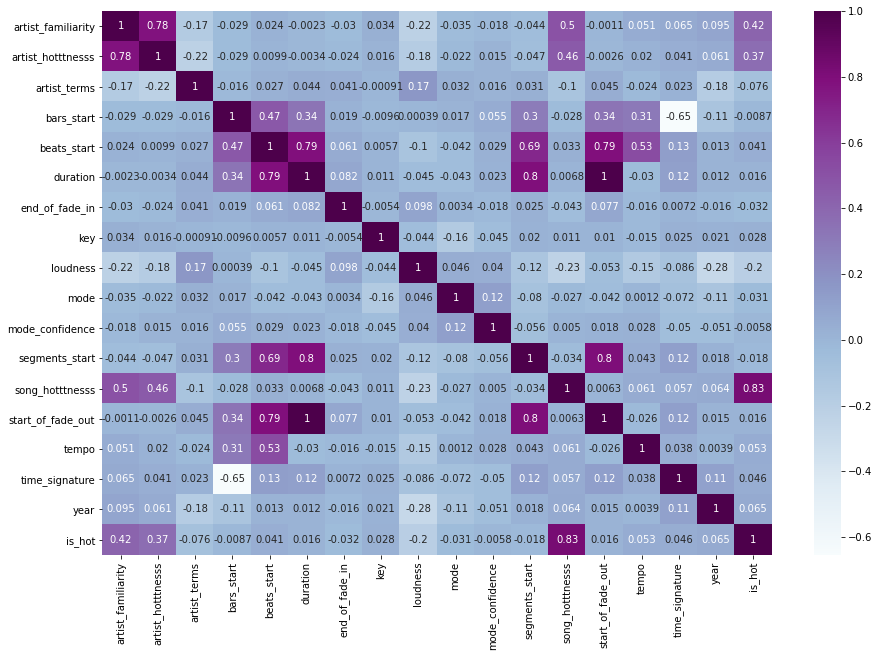

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [40]:
df = df.drop(['song_hotttnesss'], axis=1) 

In [41]:
X = df.drop(['is_hot'],axis=1) 
y = df['is_hot'].astype('int')

In [42]:
df.head()

,artist_familiarity,artist_hotttnesss,artist_terms,bars_start,beats_start,duration,end_of_fade_in,key,loudness,mode,mode_confidence,segments_start,start_of_fade_out,tempo,time_signature,year,is_hot
0,0.651046,0.371106,0.473684,0.099458,0.184462,0.125491,0.002002,0.181818,0.095684,1.0,0.371,0.171539,0.119373,0.501544,0.571429,0.946429,1.0
1,0.426668,0.306951,0.289474,0.084087,0.158288,0.163412,0.160742,0.363636,0.314407,1.0,0.652,0.233376,0.157583,0.334947,0.571429,0.535714,0.0
2,0.636424,0.413796,0.605263,0.222423,0.411300,0.302789,0.000000,0.636364,0.194772,1.0,0.829,0.418629,0.301476,0.463226,0.571429,0.589286,0.0
3,0.707200,0.474330,0.605263,0.160036,0.296635,0.176310,0.004398,0.636364,0.114407,1.0,0.756,0.212678,0.174451,0.580113,0.571429,0.892857,1.0
4,0.839963,0.500589,0.394737,0.128391,0.237640,0.124340,0.001850,0.636364,0.089921,1.0,0.453,0.183441,0.123173,0.645059,0.571429,0.892857,1.0


In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2    

In [44]:
kbest = SelectKBest(score_func = chi2, k = 'all') 
ordered_features = kbest.fit(X,y)

In [45]:
df_scores = pd.DataFrame(ordered_features.scores_, columns=['Score'])

In [46]:
df_columns = pd.DataFrame(X.columns, columns = ['Feature_name'])

In [47]:
feature_rank = pd.concat([df_scores,df_columns],axis=1) # combine the two dataframes

In [48]:
feature_rank.nlargest(16,'Score')

,Score,Feature_name
0,12.080441,artist_familiarity
1,9.689970,artist_hotttnesss
8,7.388624,loudness
2,1.126279,artist_terms
9,0.826099,mode
15,0.461513,year
7,0.453713,key
6,0.388371,end_of_fade_in
14,0.324071,time_signature
13,0.287015,tempo


# Extra Trees Classifier

In [49]:
from sklearn.ensemble import ExtraTreesClassifier 

In [50]:
model = ExtraTreesClassifier()
model.fit(X,y) # pass input and output data to the method

ExtraTreesClassifier()

In [51]:
model.feature_importances_

array([0.15024039, 0.1196944 , 0.06401537, 0.05017501, 0.05238652,
       0.05079175, 0.05277274, 0.05267542, 0.07164247, 0.01979281,
       0.05839834, 0.05630048, 0.05246761, 0.05614939, 0.03199803,
       0.06049927])

In [52]:
ranked_features = pd.Series(model.feature_importances_, index = X.columns)

<AxesSubplot:>

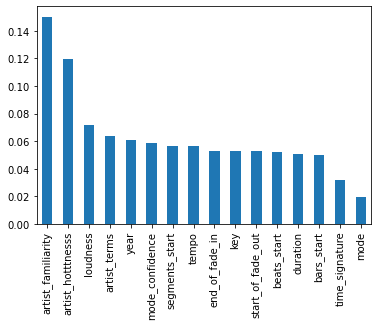

In [53]:
ranked_features.nlargest(16).plot(kind='bar')

# Mutual Information Gain

In [54]:
from sklearn.feature_selection import mutual_info_classif
mu_ifo = mutual_info_classif(X,y)

In [55]:
mu_data = pd.Series(mu_ifo, index = X.columns)
mu_data.sort_values(ascending=False)

artist_familiarity    0.182863
artist_hotttnesss     0.164573
artist_terms          0.032147
loudness              0.026046
key                   0.025010
segments_start        0.018841
time_signature        0.014885
beats_start           0.014081
mode_confidence       0.010007
bars_start            0.007473
year                  0.004861
duration              0.000000
end_of_fade_in        0.000000
mode                  0.000000
start_of_fade_out     0.000000
tempo                 0.000000
dtype: float64

# Training and test data

In [56]:
from sklearn.model_selection import train_test_split #library that allows for training and testing

x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.1, random_state=42)
# the test_size parameter represents the % of the data used for testing (0.1 = 10%)

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
def classify(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.1, random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy is: ', model.score(x_test,y_test)*100)
    score = cross_val_score(model,x,y,cv=5) # set the number of folds to 5
    print('Cross validation Accuaracy: ', np.mean(score)*100)

# Logistic Regression Method

In [59]:
# initialise logistic regression

from sklearn.linear_model import LogisticRegression
LG_model = LogisticRegression()
classify(LG_model, X,y)  # passing logistic regression as the model, along with x and y, to the 'classify' function

Accuracy is:  67.27941176470588
Cross validation Accuaracy:  68.47315379231141


In [60]:
LG_model.fit(x_train,y_train)

LogisticRegression()

In [61]:
y_pred = LG_model.predict(x_test)

# Logistic Regression Confusion Matrix

In [62]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

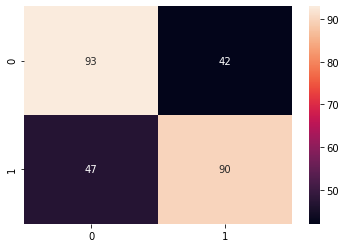

In [63]:
sns.heatmap(cm,annot=True)

# K-Nearest Neighbour Method

In [64]:
# initialise KNN

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=18) # k set to 18, though default was 5
classify(knn_model,X,y)

Accuracy is:  67.64705882352942
Cross validation Accuaracy:  64.12135668318008


In [65]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [66]:
y_pred = knn_model.predict(x_test)

# K-Nearest Neighbour Confusion Matrix

In [67]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

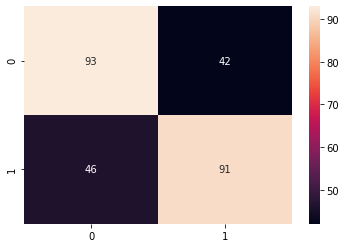

In [68]:
sns.heatmap(cm,annot=True)